#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [22]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [23]:
train_history_bce=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=12, batch_size=16, verbose=1)

Epoch 1/12
2500/2500 [==============================] - 133s 53ms/step - loss: 0.3088 - accuracy: 0.2004 - val_loss: 0.2958 - val_accuracy: 0.3076
Epoch 2/12
2500/2500 [==============================] - 128s 51ms/step - loss: 0.2820 - accuracy: 0.3126 - val_loss: 0.2806 - val_accuracy: 0.3656
Epoch 3/12
2500/2500 [==============================] - 127s 51ms/step - loss: 0.2643 - accuracy: 0.3681 - val_loss: 0.2652 - val_accuracy: 0.4107
Epoch 4/12
2500/2500 [==============================] - 127s 51ms/step - loss: 0.2506 - accuracy: 0.4074 - val_loss: 0.2531 - val_accuracy: 0.4473
Epoch 5/12
2500/2500 [==============================] - 125s 50ms/step - loss: 0.2404 - accuracy: 0.4332 - val_loss: 0.2439 - val_accuracy: 0.4664
Epoch 6/12
2500/2500 [==============================] - 140s 56ms/step - loss: 0.2321 - accuracy: 0.4546 - val_loss: 0.2380 - val_accuracy: 0.4879
Epoch 7/12
2500/2500 [==============================] - 137s 55ms/step - loss: 0.2252 - accuracy: 0.4714 - val_loss: 0

In [24]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [25]:
train_history_mse=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=12, batch_size=16, verbose=1)

Epoch 1/12
2500/2500 [==============================] - 241s 96ms/step - loss: 0.0585 - accuracy: 0.5494 - val_loss: 0.0608 - val_accuracy: 0.5669
Epoch 2/12
2500/2500 [==============================] - 247s 99ms/step - loss: 0.0583 - accuracy: 0.5510 - val_loss: 0.0605 - val_accuracy: 0.5714
Epoch 3/12
2500/2500 [==============================] - 248s 99ms/step - loss: 0.0580 - accuracy: 0.5562 - val_loss: 0.0603 - val_accuracy: 0.5735
Epoch 4/12
2500/2500 [==============================] - 245s 98ms/step - loss: 0.0577 - accuracy: 0.5575 - val_loss: 0.0601 - val_accuracy: 0.5658
Epoch 5/12
2500/2500 [==============================] - 249s 100ms/step - loss: 0.0574 - accuracy: 0.5594 - val_loss: 0.0597 - val_accuracy: 0.5723
Epoch 6/12
2500/2500 [==============================] - 220s 88ms/step - loss: 0.0572 - accuracy: 0.5621 - val_loss: 0.0594 - val_accuracy: 0.5774
Epoch 7/12
2500/2500 [==============================] - 153s 61ms/step - loss: 0.0568 - accuracy: 0.5662 - val_loss: 

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, val):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[val])
    plt.title('Train history')
    plt.legend(['train', 'val'], loc='upper left')
    plt.ylabel(train)
    plt.xlabel('Epochs')
    plt.show()

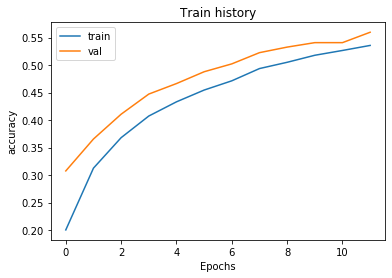

In [27]:
show_train_history(train_history_bce, 'accuracy', 'val_accuracy')

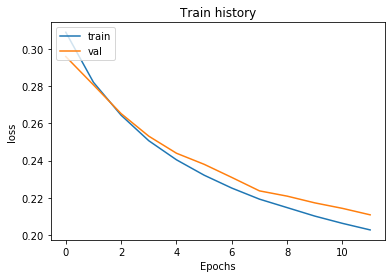

In [28]:
show_train_history(train_history_bce, 'loss', 'val_loss')

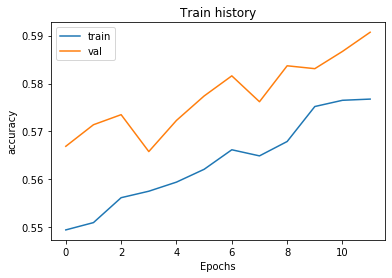

In [29]:
show_train_history(train_history_mse, 'accuracy', 'val_accuracy')

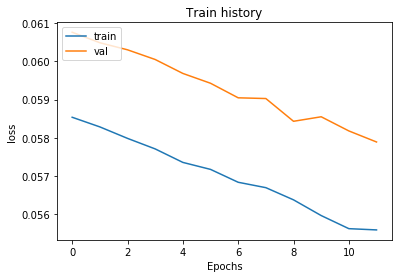

In [30]:
show_train_history(train_history_mse, 'loss', 'val_loss')